In [473]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from model import Transformer, sample_sentence, build_data
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

In [474]:
# load the model and stats
model_dict = torch.load('words.model.pth')
stats = pd.DataFrame(model_dict['stats'])
model = Transformer(**model_dict['args'])
model.load_state_dict(model_dict['state_dict'])
model.eval()
stats.head()

,loss,perplexity
0,5.167474,163.738922
1,5.108973,152.728409
2,5.028062,142.683441
3,4.959982,133.636185
4,4.896116,125.594429


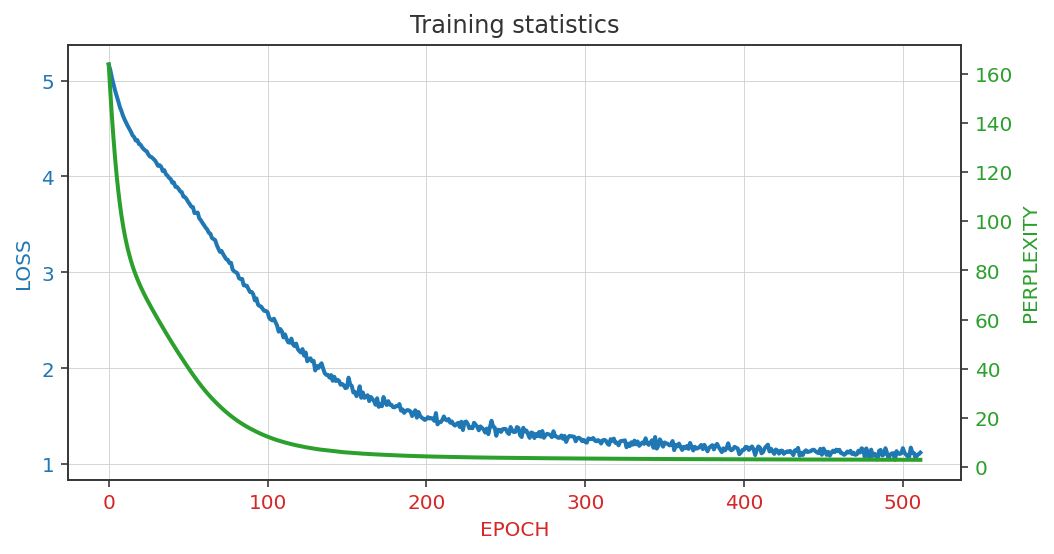

In [475]:
fig, ax1 = plt.subplots(figsize=(8, 4))
ax2 = ax1.twinx()
ax1.set_xlabel('EPOCH', c='C3')
ax1.tick_params(axis='x', labelcolor='C3')
ax1.set_ylabel('LOSS', c='C0')
ax1.tick_params(axis='y', labelcolor='C0')
ax1.plot(stats.loss, lw=2, c='C0')
ax2.set_ylabel('PERPLEXITY', c='C2')
ax2.tick_params(axis='y', labelcolor='C2')
ax2.plot(stats.perplexity, lw=2, c='C2')
ax2.grid(False)
ax1.set_title("Training statistics")
None

In [476]:
test_x = model_dict['test_x']
_, (emb_mean, emb_max) = model(test_x)

In [477]:
X_emb_max = TSNE(n_components=2).fit_transform(emb_max.detach())

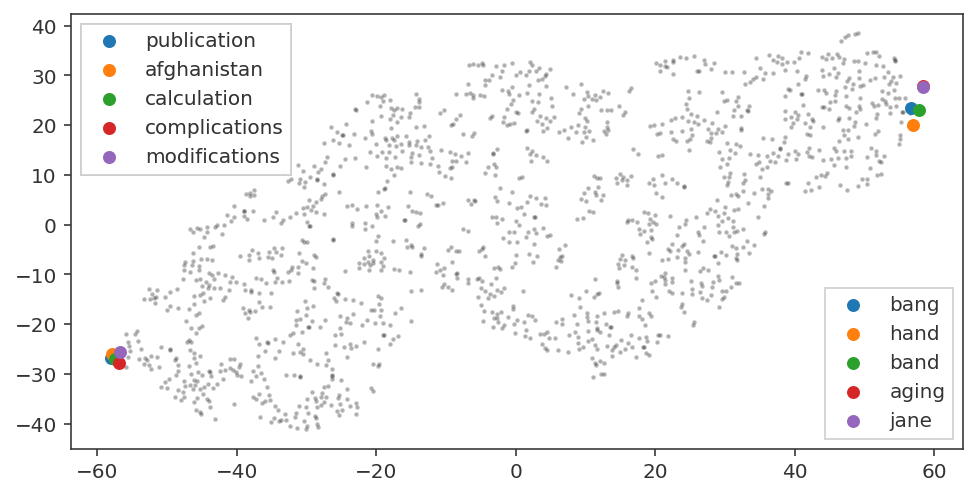

In [481]:
# highlight = X_emb.argsort(axis=0)[:, 0][0::X_emb.shape[0]//7] # indexes of words to highlight
fig, _ = plt.subplots(figsize=(8, 4))
sort_ = X_emb_max.argsort(axis=0)[:, 0] # indexes of words to highlight

plt.grid(None)
plt.scatter(X_emb_max[:, 0], X_emb_max[:, 1], s=2, c='k', alpha=0.2)
grp1, grp2 = [], []
for i, word_index in enumerate(sort_[:5]):
    word = "".join(map(lambda e: str(chr(max(32, e))), test_x[word_index].tolist())).strip()
    p = plt.scatter(X_emb_max[word_index, 0], X_emb_max[word_index, 1], s=30, c=f"C{i}", alpha=1, label=word)
    grp1.append(p)


for i, word_index in enumerate(sort_[-5:]):
    word = "".join(map(lambda e: str(chr(max(32, e))), test_x[word_index].tolist())).strip()
    p = plt.scatter(X_emb_max[word_index, 0], X_emb_max[word_index, 1], s=30, c=f"C{i}", alpha=1, label=word)
    grp2.append(p)

plt.gca().add_artist(plt.legend(handles=grp1, loc='lower right'))
plt.gca().add_artist(plt.legend(handles=grp2, loc='upper left'))
None

In [482]:
X_emb_mean = TSNE(n_components=2).fit_transform(emb_mean.detach())

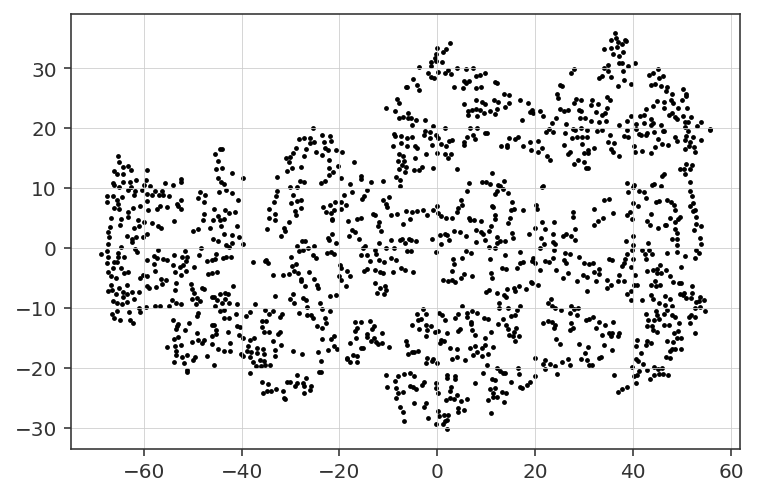

In [483]:
plt.scatter(X_emb_mean[:, 0], X_emb_mean[:, 1], s=2, c='k', alpha=1)

# clustering = DBSCAN(eps=5, min_samples=1).fit(X_emb_mean)

# for i, label in enumerate(np.unique(clustering.labels_)):
#     mask = clustering.labels_ == label
#     plt.scatter(X_emb_mean[:,0][mask], X_emb_mean[:,1][mask], s=2, c=f"C{i}", alpha=1)
# plt.legend(list(map(lambda e: f"Cluster {e}", np.unique(clustering.labels_))), ncol=3)
# None

In [466]:
# to_df = {i : [] for i in np.unique(clustering.labels_)}

# for i, label in enumerate(np.unique(clustering.labels_)):
#     mask = clustering.labels_ == label

#     for word_ in test_x[mask]:
#         word = "".join(map(lambda e: str(chr(max(32, e))), word_.tolist())).strip()
#         to_df[i].append(word)

# pd.DataFrame(list(map(lambda e: e[:5], to_df.values()))).T
# #pd.DataFrame(to_df)

,0
0,improvements
1,nervous
2,adjustable
3,biggest
4,update


In [503]:
# Sample 10 words from the model starting with 'z'
for i in range(10):
    new_word = sample_sentence(model, "z", max_len = model_dict['args']['seq_length'], temperature = 0.2)
    print(new_word)

z
zont
zaee
zaaa
zins
zuno
zunn
zaae
zaae
z ce
